In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/final_matches.csv")


In [24]:
df.head()


,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,-2,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23


In [25]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  3102 non-null   object 
 1   comp                  3102 non-null   object 
 2   round                 3102 non-null   object 
 3   day                   3102 non-null   object 
 4   venue                 3102 non-null   object 
 5   result                3102 non-null   int64  
 6   opponent              3102 non-null   object 
 7   xg                    3102 non-null   float64
 8   xga                   3102 non-null   float64
 9   poss                  3102 non-null   float64
 10  attendance            3102 non-null   float64
 11  captain               3102 non-null   object 
 12  formation             3102 non-null   object 
 13  opp formation         3102 non-null   object 
 14  sh                    3102 non-null   float64
 15  sot                  

,result,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,1.385880,1.429175,1.429175,50.000322,39007.501612,12.921019,4.327208,16.987105,0.393617,0.107672,0.130561,2023.448743,12.895503,4.323727,1.426947,1.390012,0.000000,0.500000
std,1.334568,0.839628,0.839628,12.504743,17158.719815,5.650684,2.468040,2.868765,0.620096,0.333083,0.363669,1.162589,3.260453,1.359587,0.494939,0.727324,1.981045,0.500081
min,0.000000,0.000000,0.000000,18.000000,2000.000000,1.000000,0.000000,6.800000,0.000000,0.000000,0.000000,2021.000000,3.000000,0.000000,0.300000,0.000000,-9.000000,0.000000
25%,0.000000,0.800000,0.800000,41.000000,27072.500000,9.000000,3.000000,15.100000,0.000000,0.000000,0.000000,2022.000000,10.600000,3.400000,1.080000,0.800000,-1.000000,0.000000
50%,1.000000,1.300000,1.300000,50.000000,36447.000000,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2023.000000,12.400000,4.200000,1.360000,1.400000,0.000000,0.500000
75%,3.000000,1.900000,1.900000,59.000000,53103.500000,16.000000,6.000000,18.700000,1.000000,0.000000,0.000000,2024.000000,14.800000,5.200000,1.720000,2.000000,1.000000,1.000000
max,3.000000,7.000000,7.000000,82.000000,75546.000000,37.000000,16.000000,39.900000,4.000000,3.000000,3.000000,2025.000000,25.600000,10.000000,4.100000,3.000000,9.000000,1.000000


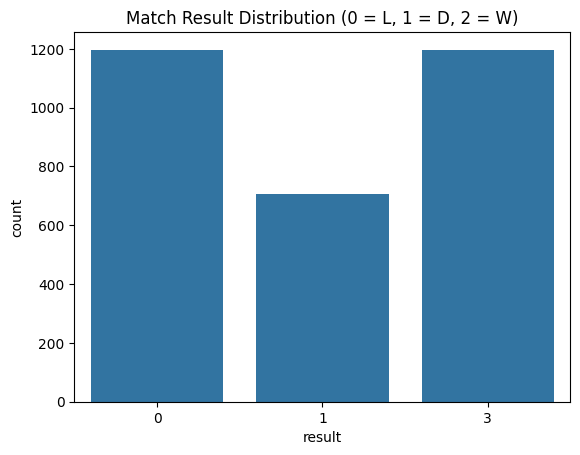

In [26]:
sns.countplot(x=df['result'])
plt.title("Match Result Distribution (0 = L, 1 = D, 2 = W)")
plt.show()


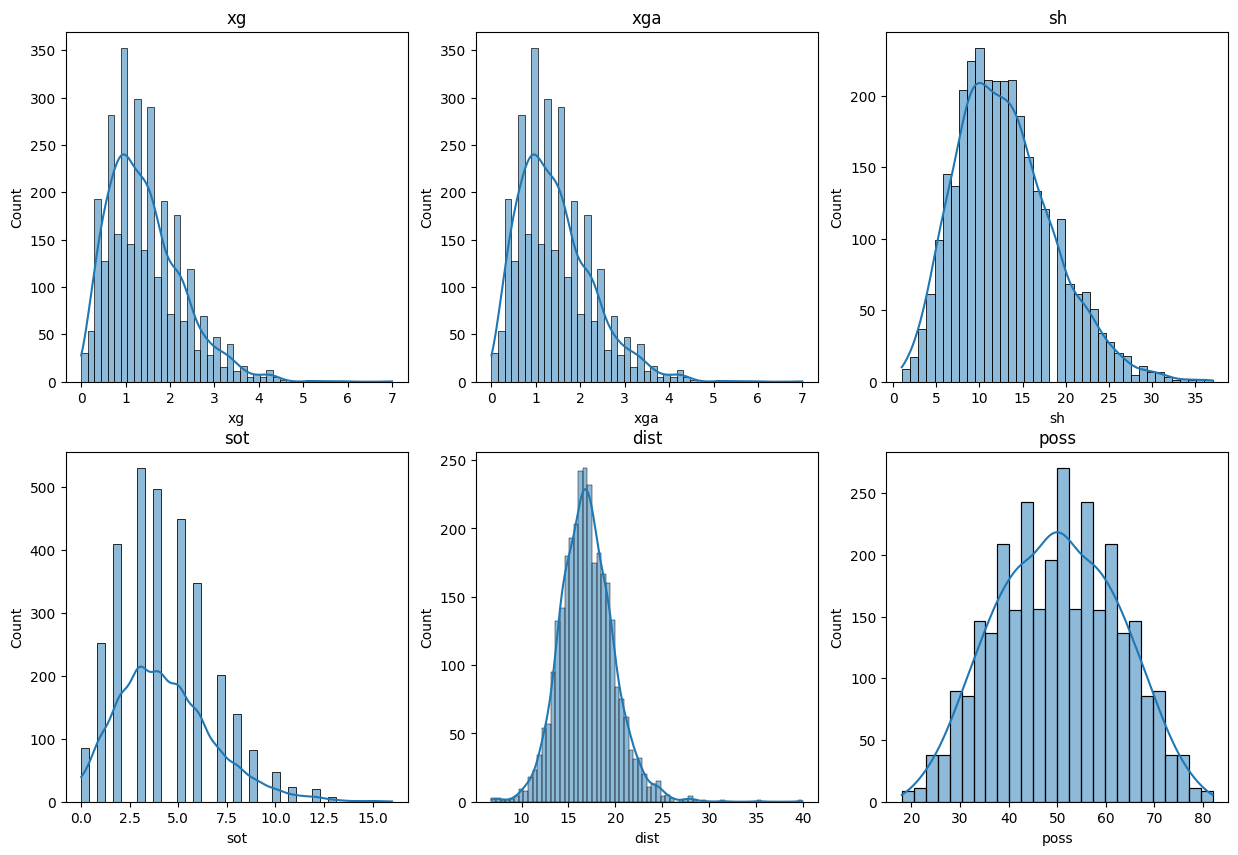

In [32]:
num_cols = ['xg','xga','sh','sot','dist','poss']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)


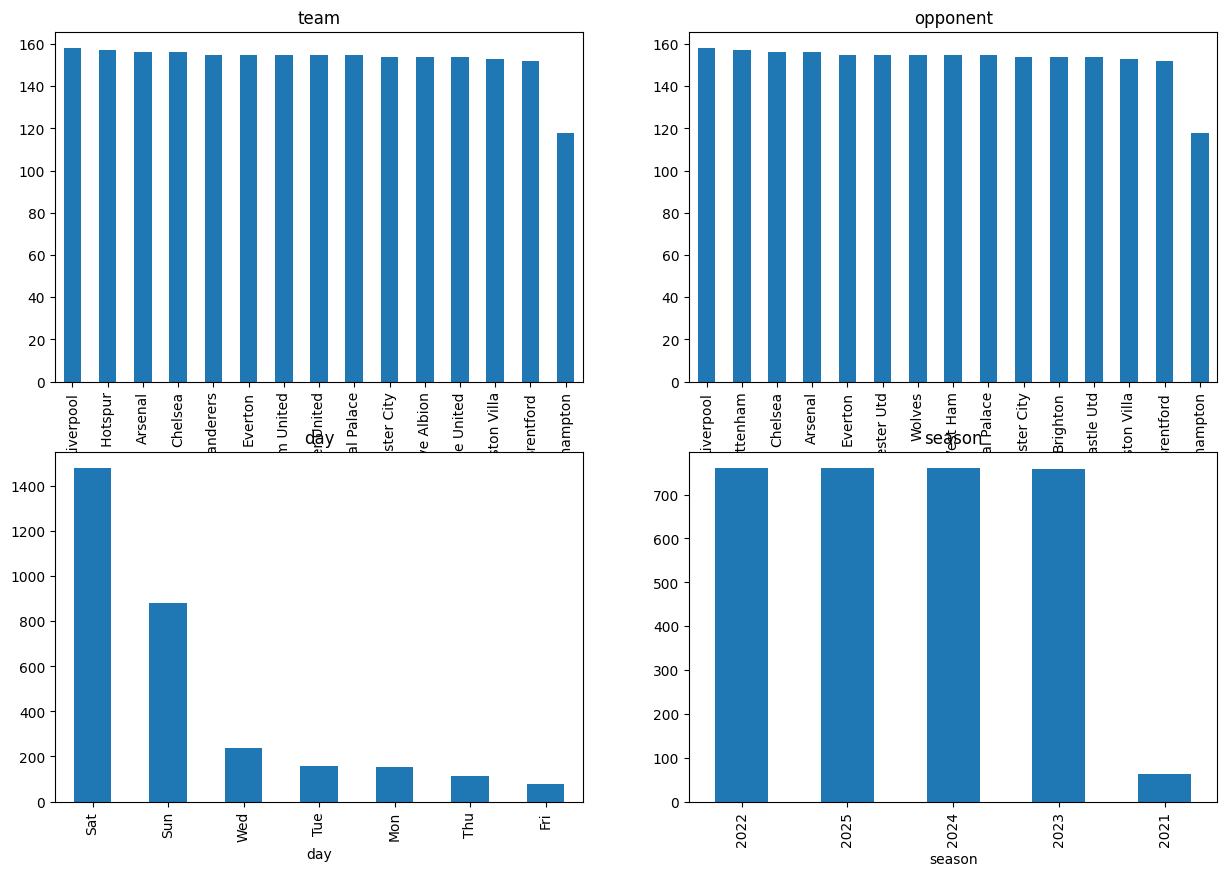

In [28]:
cat_cols = ['team','opponent','day','season']

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().head(15).plot(kind='bar')
    plt.title(col)


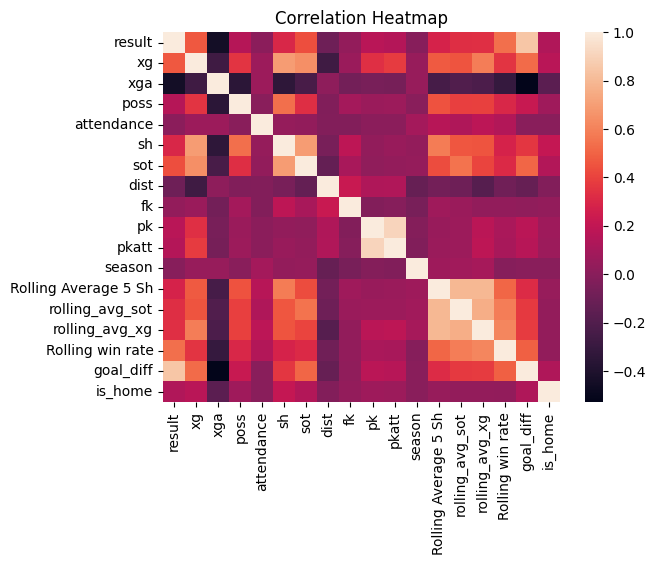

In [33]:
# plt.figure(figsize=(15,12))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

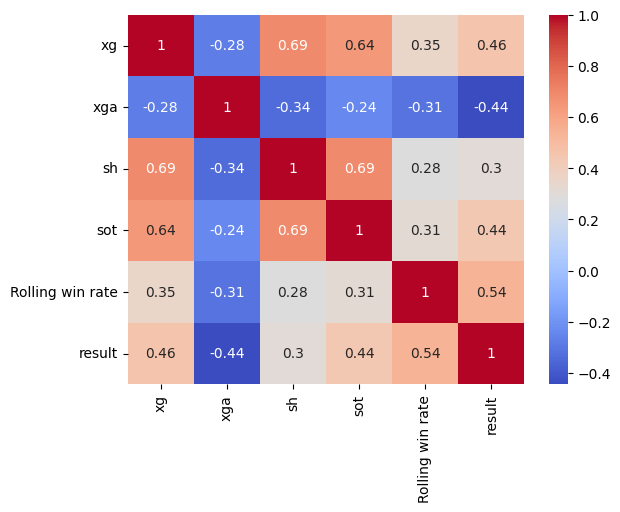

In [34]:
cols = ['xg','xga','sh','sot','Rolling win rate','result']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')


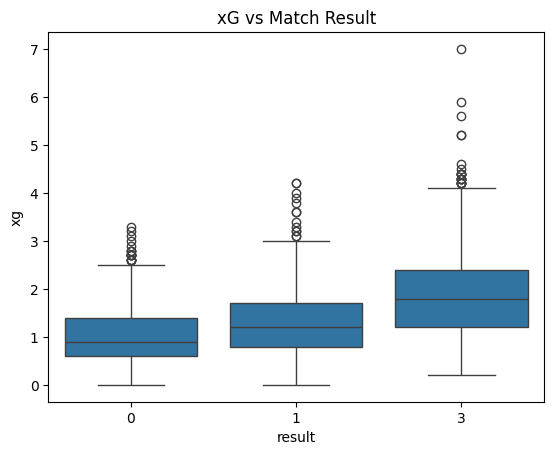

In [35]:
sns.boxplot(x=df['result'], y=df['xg'])
plt.title("xG vs Match Result")
plt.show()


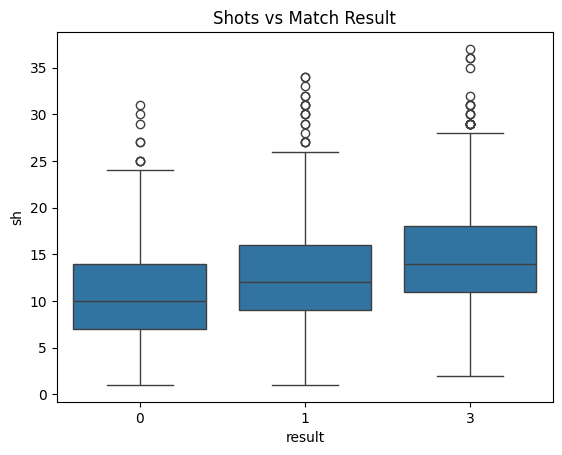

In [36]:
sns.boxplot(x=df['result'], y=df['sh'])
plt.title("Shots vs Match Result")
plt.show()


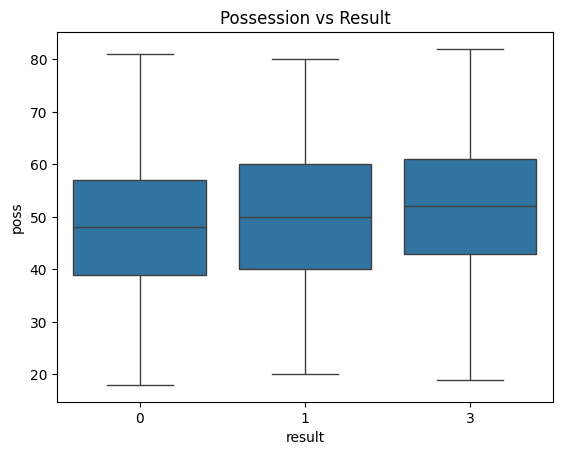

In [37]:
sns.boxplot(x=df['result'], y=df['poss'])
plt.title("Possession vs Result")
plt.show()


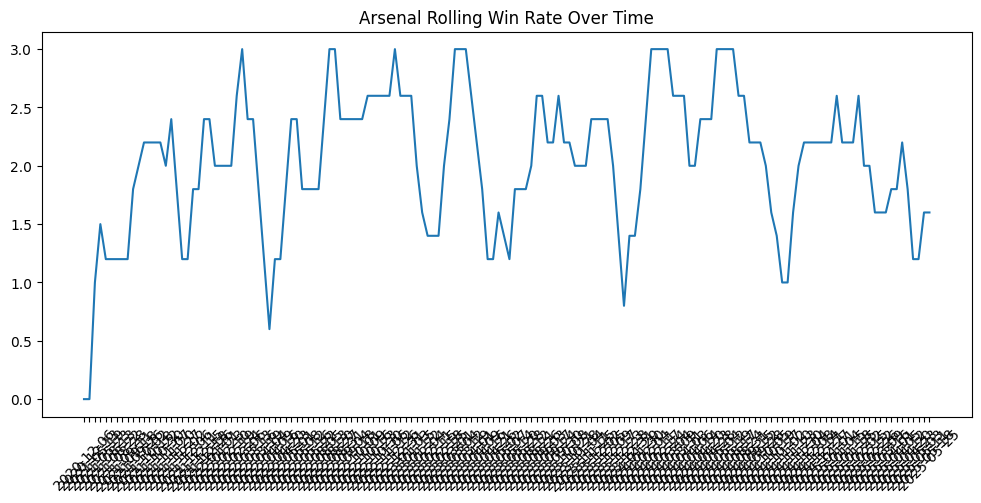

In [38]:
team = "Arsenal"
temp = df[df['team'] == team]

plt.figure(figsize=(12,5))
plt.plot(temp['date'], temp['Rolling win rate'])
plt.title(f"{team} Rolling Win Rate Over Time")
plt.xticks(rotation=45)
plt.show()


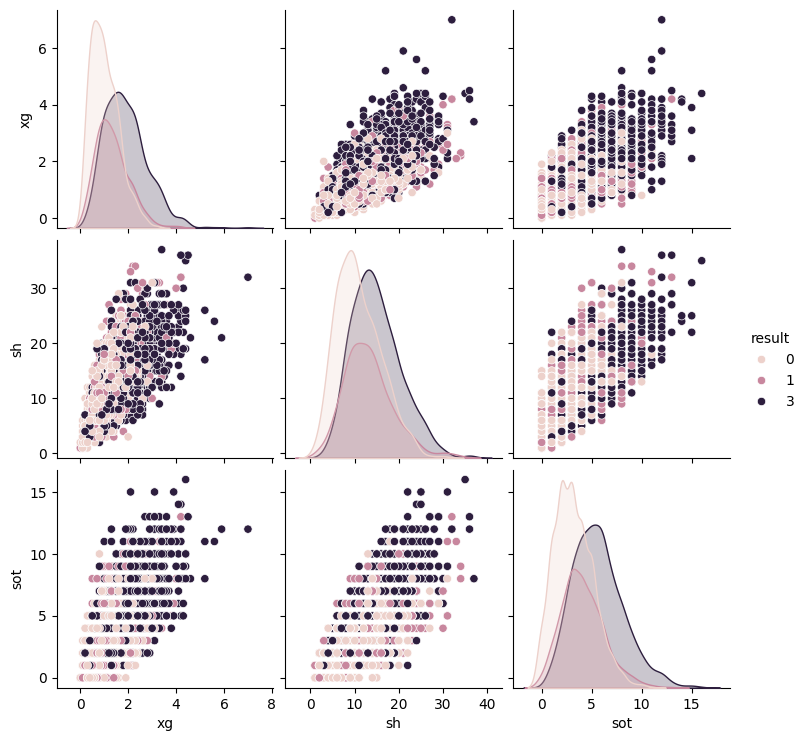

In [39]:
sns.pairplot(df[['xg','sh','sot','result']], hue='result')
plt.show()
